In [58]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [59]:
# Берем датасет с ирисами:
iris = load_iris()

In [60]:
# Оставляем два признака - sepal_length и sepal_width и целевую переменную - variety
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data = data[['sepal length (cm)', 'sepal width (cm)']]
data['variety'] = iris.target

data

,sepal length (cm),sepal width (cm),variety
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [61]:
# Разделим данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [62]:
data_train

,sepal length (cm),sepal width (cm),variety
104,6.5,3.0,2
135,7.7,3.0,2
52,6.9,3.1,1
78,6.0,2.9,1
19,5.1,3.8,0
...,...,...,...
119,6.0,2.2,2
131,7.9,3.8,2
93,5.0,2.3,1
61,5.9,3.0,1


In [63]:
data_test.head()

,sepal length (cm),sepal width (cm),variety
74,6.4,2.9,1
20,5.4,3.4,0
0,5.1,3.5,0
24,4.8,3.4,0
70,5.9,3.2,1


In [64]:
len(data_test)

30


Из тренировочных и тестовых данных удаляем столбец 'variety' и импортируем метод для построения линейного дискриминантного анализа.

In [65]:
y_train, y_test = data_train['variety'], data_test['variety']
del data_train['variety']
del data_test['variety']



In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [67]:
lda = LinearDiscriminantAnalysis()

In [68]:
# обучение модели на тренировочных данных

lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [69]:
# импорт метода подсчета точности предсказанных данных в сравнении с фактическими

from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(y_test, lda.predict(data_test))

0.8


Точность 76% - это соотношение верно предсказанных ответов к общему количеству ответов.

In [71]:
lda.coef_

array([[-5.60429483,  7.71845699],
       [ 1.28655297, -3.28073549],
       [ 3.88556906, -4.0825593 ]])

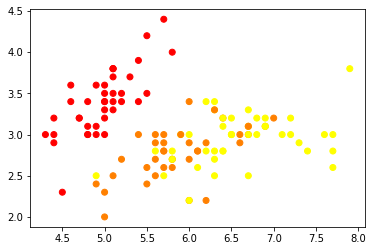

In [72]:
# визуализиреум тестовую выборку
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train, cmap='autumn')
plt.show()

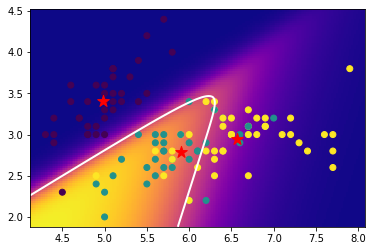

In [73]:
# визуализируем центры кластеров
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='plasma',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [74]:
import matplotlib.colors as mcolors

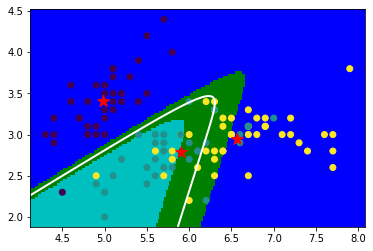

In [75]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=mcolors.ListedColormap(["b", "g", "c"]),
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [76]:
# узнаем, какое количество кластеров предложит модель:
data_claster = data[['sepal length (cm)', 'sepal width (cm)']]
data_claster.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [77]:
X = data_claster.values


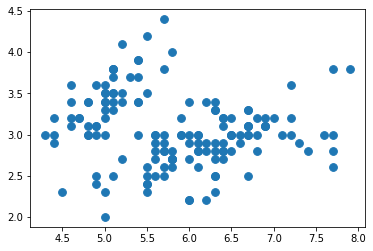

In [78]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

In [81]:
X_scaled = scaler.fit_transform(X)

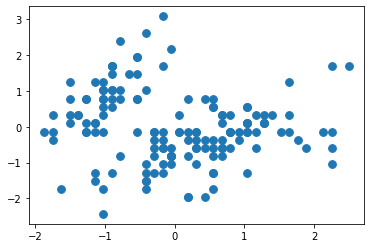

In [82]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [83]:
from sklearn.cluster import KMeans

In [84]:
# метод локтя

k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

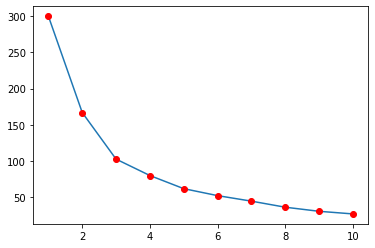

In [85]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Метод  локтя показывает, что оптимальное количество кластеров- 3(три).

In [86]:

kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

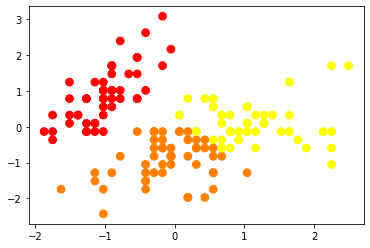

In [87]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)


"Оранжевый" кластер отделен от остальных двух явной границей, логично, за исключением одной точки, близкой к "красному". "Красный" и "желтый" кластеры выраженной границы не имеют, что, собственно и было понятно из графика "метода локтя", где угол падения кривой на отрезке 1-2 гораздо больше угла на отрезке 2-3.